In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## American Community Survey Immigration Data

* A large proportion of taxi drivers are immigrants compared to the general population
* Looking at American Community Survey from 2014 data indicating birth in the United States or abroad at the block group level, and merging this with the locations of residential parking tickets given to taxis 

In [3]:
chi_res_tix = pd.read_csv('taxi_ticket_data/immigration_acs_data/chi_bg_res_tix_join.csv')
print(chi_res_tix.shape)
print(chi_res_tix.dtypes)
chi_res_tix.head()

(1678, 7)
gid              int64
gisjoin         object
total_pop        int64
native_pop       int64
forgn_pop        int64
forgn_pct      float64
res_tickets      int64
dtype: object


,gid,gisjoin,total_pop,native_pop,forgn_pop,forgn_pct,res_tickets
0,251,G17003105203003,1129,718,411,0.36404,1
1,2026,G17003102420002,1802,1515,287,0.15927,3
2,264,G17003103510001,1011,970,41,0.04055,21
3,1070,G17003103907002,1466,1377,89,0.06071,18
4,1350,G17003103812002,1302,1265,37,0.02842,23


In [4]:
chi_res_tix_high = chi_res_tix[chi_res_tix['res_tickets'] > 50]
print(chi_res_tix_high.shape)
chi_res_tix_high.head()

(151, 7)


,gid,gisjoin,total_pop,native_pop,forgn_pop,forgn_pct,res_tickets
16,1283,G17003107608033,1807,876,931,0.51522,343
33,1171,G17003100315013,1221,867,354,0.28993,79
43,1582,G17003101502002,1665,1008,657,0.39459,224
49,489,G17003100106002,844,599,245,0.29028,120
56,325,G17003104601004,798,586,212,0.26566,57


/Library/Python/2.7/site-packages/matplotlib-override/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


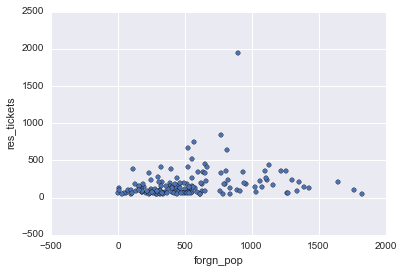

In [5]:
chi_res_tix_high.plot(x='forgn_pop', y='res_tickets', kind='scatter')

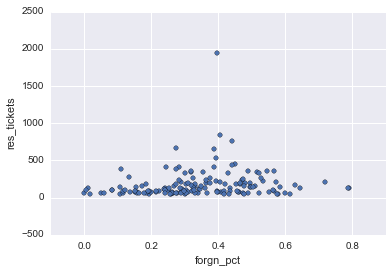

In [6]:
chi_res_tix_high.plot(x='forgn_pct', y='res_tickets', kind='scatter')

In [7]:
print('Total block groups: {}'.format(chi_res_tix['gid'].count()))
print('Total block groups with more than 300 residential tickets: {}'.format(chi_res_tix[chi_res_tix['res_tickets'] > 300]['gid'].count()))

Total block groups: 1678
Total block groups with more than 300 residential tickets: 23


In [8]:
mean_foreign_pop = chi_res_tix['forgn_pop'].mean()
print('Mean foreign-born pop for all block groups: {}'.format(mean_foreign_pop))
high_res_tix_bg = chi_res_tix[chi_res_tix['res_tickets'] > 300]
print('Mean foreign-born pop for highest residential tickets: {}'.format(high_res_tix_bg['forgn_pop'].mean()))

Mean foreign-born pop for all block groups: 286.1829559
Mean foreign-born pop for highest residential tickets: 701.652173913


In [9]:
mean_foreign_pop = chi_res_tix['forgn_pct'].mean()
print('Mean foreign-born % for all block groups: {}'.format(mean_foreign_pop))
high_res_tix_bg = chi_res_tix[chi_res_tix['res_tickets'] > 300]
print('Mean foreign-born % for highest residential tickets: {}'.format(high_res_tix_bg['forgn_pct'].mean()))

Mean foreign-born % for all block groups: 0.200874755078
Mean foreign-born % for highest residential tickets: 0.384797826087


In [10]:
print('Total block groups: {}'.format(chi_res_tix['gid'].count()))
print('Total block groups with more than 200 residential tickets: {}'.format(chi_res_tix[chi_res_tix['res_tickets'] > 200]['gid'].count()))

Total block groups: 1678
Total block groups with more than 200 residential tickets: 37


In [11]:
chi_res_tix.describe()

/usr/local/lib/python2.7/site-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,gid,total_pop,native_pop,forgn_pop,forgn_pct,res_tickets
count,1678.000000,1678.000000,1678.000000,1678.000000,1674.000000,1678.000000
mean,1171.135876,1296.116806,1009.933850,286.182956,0.200875,23.293802
std,668.476487,602.039041,483.107358,302.071582,0.171926,77.538134
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,605.250000,896.250000,704.250000,40.000000,NaN,2.000000
50%,1171.500000,1211.500000,938.000000,192.000000,NaN,5.000000
75%,1765.750000,1583.000000,1253.000000,446.000000,NaN,14.000000
max,2330.000000,8881.000000,7963.000000,1822.000000,0.789860,1940.000000


In [15]:
res_tix_300 = chi_res_tix[chi_res_tix['res_tickets'] > 300]
res_tix_300 = res_tix_300.sort_values('res_tickets', ascending=False)
res_tix_300.head()

,gid,gisjoin,total_pop,native_pop,forgn_pop,forgn_pct,res_tickets
1236,1315,G17003100209021,2261,1366,895,0.39584,1940
125,879,G17003100204003,1908,1134,774,0.40566,839
506,424,G17003108080022,1286,717,569,0.44246,754
1079,1581,G17003101005005,1897,1376,521,0.27464,669
1050,483,G17003100107011,2105,1288,817,0.38812,646


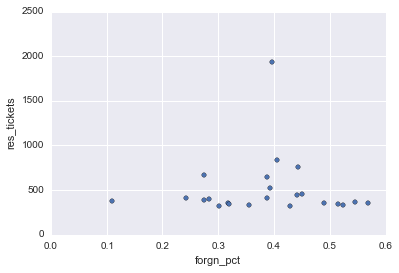

In [16]:
res_tix_300.plot(x='forgn_pct', y='res_tickets', kind='scatter')

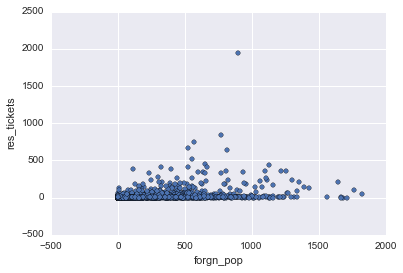

In [17]:
chi_res_tix.plot(x='forgn_pop', y='res_tickets', kind='scatter')

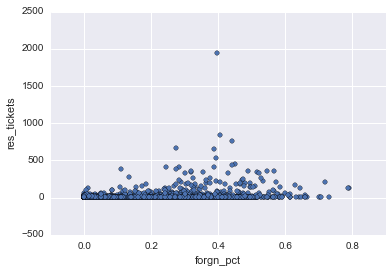

In [18]:
chi_res_tix.plot(x='forgn_pct', y='res_tickets', kind='scatter')

## Top Wards for Residential Tickets

* The top wards for residential parking taxi tickets are those which contain some of the largest immigrant enclaves in Chicago (in particular the area around Devon Ave's South Asian community around the 40th and 50th)

In [22]:
ward_tickets = pd.read_csv('taxi_ticket_data/taxi_tickets_by_ward.csv')
print(ward_tickets.shape)
res_ward_tickets = ward_tickets[ward_tickets['Violation Code'] == '0964170A']
print(res_ward_tickets.shape)
ward_tickets_grouped = res_ward_tickets.groupby(['Ward'])['Ticket Number'].count()
ward_tickets_grouped.sort_values(ascending=False, inplace=True)

(261936, 16)
(39096, 16)


Top 5 wards have 21724 taxi residential parking tickets
All other wards combined have 17372 taxi residential parking tickets


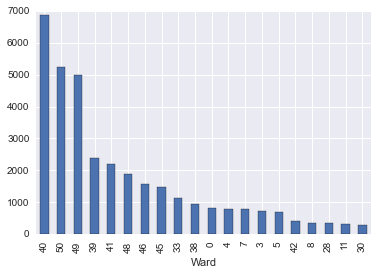

In [23]:
ward_top_5_tix = ward_tickets_grouped[:5].sum()
other_ward_tix = ward_tickets_grouped[5:].sum()
print('Top 5 wards have {} taxi residential parking tickets'.format(ward_top_5_tix))
print('All other wards combined have {} taxi residential parking tickets'.format(other_ward_tix))
ward_tickets_grouped[:20].plot(kind='bar')